In [1]:
%matplotlib notebook
%pylab

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


In [2]:
m = 99
a = 0
b = 2*pi
f = lambda x: -4*cos(2*x)
uexact = lambda x: cos(2*x)

sigma0 = 0
sigma1 = 0

h = (b-a)/(m+1)
x = zeros(m+2)
Ag = zeros((m+3, m+3))
F = zeros(m+3)
for j in range(m+2):
    xj = a+j*h
    x[j] = xj
    Ag[j,j] = -2/h**2
    
    if (j == 0):
        Ag[j,j+1] = 2/h**2
        Ag[j,-1] = 1/2
        Ag[-1,j] = 1/2
        F[j] = f(xj) + (2/h)*sigma0
        
    elif (0 < j < m+1):
        Ag[j,j+1] = 1/h**2
        Ag[j,j-1] = 1/h**2
        Ag[j,-1] = 1
        Ag[-1,j] = 1
        F[j] = f(xj)
        
    else:
        
        Ag[j,j+1] = 1/2
        Ag[j,j-1] = 2/h**2
        Ag[-1,j] = 1/2
        F[j] = f(xj) - (2/h)*sigma1
        
Ug = solve(Ag, F)

<IPython.core.display.Javascript object>


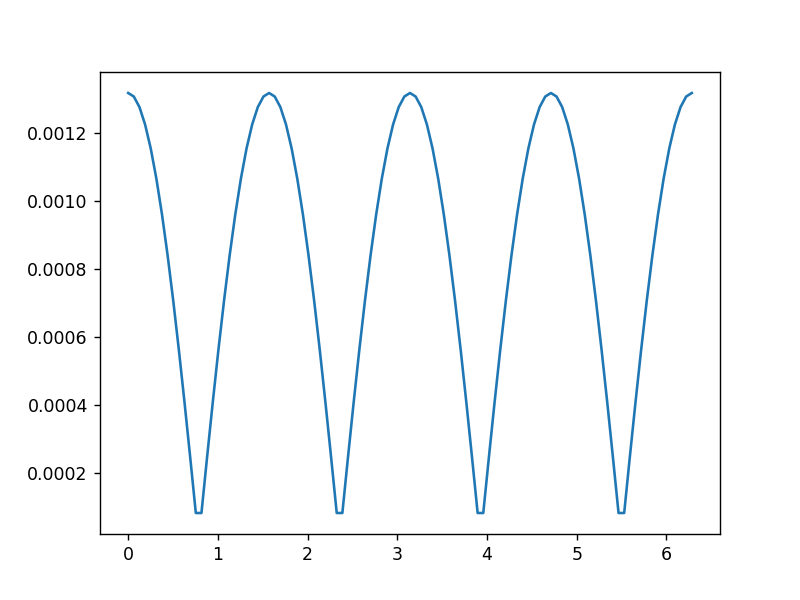

In [4]:
ue = uexact(x)             # exact solution
u = Ug[:-1]          # approximate solution
error = abs(ue - u)# error

figure(2)
plot(x,error)

In [5]:
def RelativeL2Norm(U_approx,U_exact):
    
    '''
    RelativeL2Norm(U_approx,U_exact)
    
    calculates the relative 2-norm of the erros in approximations of first and second derivatives
    
    Arguments:
    ----------
    
    U_approx: array that contains the approximation values of the derivative
    U_exact: array that contains the exact values of the derivative
    
    Returns:
    --------
    
    L2N: relative tow-norm of the errors of the approximation of the derivative
    
    '''
    
        
    Rn = (U_approx - U_exact)**2
        
    L2N = sqrt(sum(Rn)/sum(U_exact**2))
        
    return L2N

In [6]:
Er = RelativeL2Norm(u, ue)
print('The relative two-norm of the error is: ',Er)

The relative two-norm of the error is:  0.0013169869352425603


In [7]:
print('The value of lambda is: ',Ug[-1])

The value of lambda is:  -2.0084436626384742e-16


(d)

In [8]:
m = 99
a = 0
b = 2*pi
f1 = lambda x: x
uexact = lambda x: cos(2*x)

sigma0 = -pi**2
sigma1 =  pi**2

h = (b-a)/(m+1)
x = zeros(m+2)
Ag1 = zeros((m+3, m+3))
F1 = zeros(m+3)
for j in range(m+2):
    xj = a+j*h
    x[j] = xj
    Ag1[j,j] = -2/h**2
    
    if (j == 0):
        Ag1[j,j+1] = 2/h**2
        Ag1[j,-1] = 1/2
        Ag1[-1,j] = 1/2
        F1[j] = f1(xj) + (2/h)*sigma0
        
    elif (0 < j < m+1):
        Ag1[j,j+1] = 1/h**2
        Ag1[j,j-1] = 1/h**2
        Ag1[j,-1] = 1
        Ag1[-1,j] = 1
        F1[j] = f1(xj)
        
    else:
        
        Ag1[j,j+1] = 1/2
        Ag1[j,j-1] = 2/h**2
        Ag1[-1,j] = 1/2
        F1[j] = f1(xj) - (2/h)*sigma1
        
Ug1 = solve(Ag1, F1)

<IPython.core.display.Javascript object>


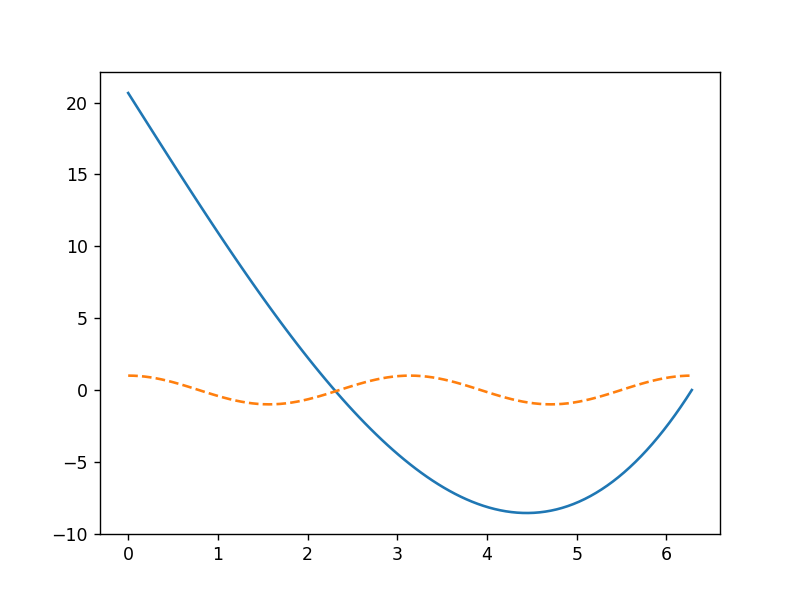

In [9]:
ue = uexact(x)             # exact solution
u = Ug1[:-1]          # approximate solution

figure(3)

plot(x, u, label = 'Approximate')
plot(x, ue, '--', label = 'Exact')